In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import gseapy as gp
from gseapy.plot import barplot, dotplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib import rcParams
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [ ]:
# with open("go-basic_id_new1_set.obo") as f:
#     go_py={}
#     for i in f:
#         i=i.strip().split("\t")
#         if i[0] not in go_py.keys():
#             go_py[i[0]]=[[],[]]
#             go_py[i[0]][0]=i[1].split(": ")[1]
#             go_py[i[0]][1]=i[2].split(": ")[1]
# #     print(go_py)

In [ ]:
# with open("nine_one_all_fin.emapper.annotations_GO.txt") as f:
#     go_gene={}
#     l=[]
#     for i in f:
#         i=i.strip().split("\t")
#         gene=i[0]
#         go=i[1]
#         go_pathway=go.split(",")
#         for j in range(len(go_pathway)):
#                 if go_pathway[j] in go_py.keys():
#                     go_pathway1=str(go_pathway[j])+":"+str(go_py[go_pathway[j]][0])+"_"+str(go_py[go_pathway[j]][1])
# #                     print(go_pathway1)
#                     if go_pathway1 not in go_gene.keys():
#                         go_gene[go_pathway1]=[gene]
#                     else:
#                         go_gene[go_pathway1].append(gene)
#                 else:
#                     print(go_pathway[j])
                    

In [ ]:
# gene_list="./all_hotspot_df_MGE_pro_uniq.txt"
# enr_go = gp.enrichr(gene_list=gene_list,#所需查询gene_list，可以是一个列表，也可为文件（一列，每行一个基因）
#                  gene_sets=go_gene,#gene set library，多个相关的gene set 。如所有GO term组成一个gene set library.
# #                  organism='Human',#持(human, mouse, yeast, fly, fish, worm)， 自定义gene_set 则无影响。
# #                  description='kegg',#工作运行描述
#                  outdir='./pathway_new_hotspot_go1',#输出目录
#                  top_term=1000,
#                  cutoff=0.01#pvalue阈值
#                  )

In [3]:
enr_go_res2d=pd.read_csv("./pathway_new_hotspot_go1/gs_ind_0.human.enrichr.reports.txt", sep='\t')

In [4]:
# print(enr_go.res2d["Term"][0])
# print(type(enr_go.res2d))
term=[]
overlap=[]
pval=[]
oddratio=[]
combinedscore=[]
adjustedpval=[]
logadjustedpval=[]
gene_ratio=[]
fdr=[]
gene=[]
term_bp=[]
overlap_bp=[]
pval_bp=[]
oddratio_bp=[]
combinedscore_bp=[]
adjustedpval_bp=[]
logadjustedpval_bp=[]
gene_ratio_bp=[]
fdr_bp=[]
gene_bp=[]
term_mf=[]
overlap_mf=[]
fdr_mf=[]
pval_mf=[]
oddratio_mf=[]
combinedscore_mf=[]
gene_ratio_mf=[]
adjustedpval_mf=[]
logadjustedpval_mf=[]
gene_mf=[]
term_cc=[]
fdr_cc=[]
overlap_cc=[]
pval_cc=[]
adjustedpval_cc=[]
gene_ratio_cc=[]
logadjustedpval_cc=[]
oddratio_cc=[]
combinedscore_cc=[]
gene_cc=[]
process=[]
dd=float("inf")
for  m in range(len(enr_go_res2d["Term"])):
    if "_".join(enr_go_res2d["Term"][m].split("_")[1:])=="biological_process" and enr_go_res2d["P-value"][m]<=0.01:
        term_bp.append(enr_go_res2d["Term"][m].split("_")[0].split(":")[-1])
        overlap_bp.append(enr_go_res2d["Overlap"][m])
        gene_ratio_bp.append(int(enr_go_res2d["Overlap"][m].split("/")[0])/int(enr_go_res2d["Overlap"][m].split("/")[1]))
#         print(1/enr_go.res2d["Adjusted P-value"][m])
        if (1/enr_go_res2d["Adjusted P-value"][m])==dd:
#             print(1/enr_go.res2d["Adjusted P-value"][m])
            fdr_bp.append(299)
        else:
            fdr_bp.append(int(float(np.log10(1/enr_go_res2d["Adjusted P-value"][m]))))
        pval_bp.append(enr_go_res2d["P-value"][m])
        adjustedpval_bp.append(enr_go_res2d["Adjusted P-value"][m])
        logadjustedpval_bp.append(-np.log10(enr_go_res2d["Adjusted P-value"][m]))
        oddratio_bp.append(enr_go_res2d["Odds Ratio"][m])
        combinedscore_bp.append(enr_go_res2d["Combined Score"][m])
        gene_bp.append(enr_go_res2d["Genes"][m])
    elif "_".join(enr_go_res2d["Term"][m].split("_")[1:])=="molecular_function" and enr_go_res2d["P-value"][m]<=0.01:
        term_mf.append(enr_go_res2d["Term"][m].split("_")[0].split(":")[-1])
        overlap_mf.append(enr_go_res2d["Overlap"][m])
        if (1/enr_go_res2d["Adjusted P-value"][m])==dd:
            fdr_mf.append(299)
        else:
            fdr_mf.append(int(float(np.log10(1/enr_go_res2d["Adjusted P-value"][m]))))
        pval_mf.append(enr_go_res2d["P-value"][m])
        adjustedpval_mf.append(enr_go_res2d["Adjusted P-value"][m])
        gene_ratio_mf.append(int(enr_go_res2d["Overlap"][m].split("/")[0])/int(enr_go_res2d["Overlap"][m].split("/")[1]))
        logadjustedpval_mf.append(-np.log10(enr_go_res2d["Adjusted P-value"][m]))
        oddratio_mf.append(enr_go_res2d["Odds Ratio"][m])
        combinedscore_mf.append(enr_go_res2d["Combined Score"][m])
        gene_mf.append(enr_go_res2d["Genes"][m])
    elif "_".join(enr_go_res2d["Term"][m].split("_")[1:])=="cellular_component" and enr_go_res2d["P-value"][m]<=0.01:
        term_cc.append(enr_go_res2d["Term"][m].split("_")[0].split(":")[-1])
        overlap_cc.append(enr_go_res2d["Overlap"][m])
        gene_ratio_cc.append(int(enr_go_res2d["Overlap"][m].split("/")[0])/int(enr_go_res2d["Overlap"][m].split("/")[1]))
        pval_cc.append(enr_go_res2d["P-value"][m])
        adjustedpval_cc.append(enr_go_res2d["Adjusted P-value"][m])
        if (1/enr_go_res2d["Adjusted P-value"][m])==dd:
            fdr_cc.append(299)
        else:
            fdr_cc.append(int(float(np.log10(1/enr_go_res2d["Adjusted P-value"][m]))))
#         print(-np.log10(enr_go.res2d["Adjusted P-value"][m]))
        logadjustedpval_cc.append(-np.log10(enr_go_res2d["Adjusted P-value"][m]))
        oddratio_cc.append(enr_go_res2d["Odds Ratio"][m])
        combinedscore_cc.append(enr_go_res2d["Combined Score"][m])
        gene_cc.append(enr_go_res2d["Genes"][m])
term=term_bp+term_mf+term_cc
overlap=overlap_bp+overlap_mf+overlap_cc
pval=pval_bp+pval_mf+pval_cc
adjustedpval=adjustedpval_bp+adjustedpval_mf+adjustedpval_cc
logadjustedpval=logadjustedpval_bp+logadjustedpval_mf+logadjustedpval_cc
oddratio=oddratio_bp+oddratio_mf+oddratio_cc
combinedscore=combinedscore_bp+combinedscore_mf+combinedscore_cc
gene=gene_bp+gene_mf+gene_cc
gene_ratio=gene_ratio_bp+gene_ratio_mf+gene_ratio_cc
fdr=fdr_bp+fdr_mf+fdr_cc
process=["bp"]*len(term_bp)+["mf"]*len(term_mf)+["cc"]*len(term_cc)
dataset=pd.DataFrame({"Term":term,"Overlap":overlap,"P-value":pval,"Adjusted P-value":adjustedpval,"-log10(Adjusted P-value)":logadjustedpval,
                              "Odds Ratio":oddratio,"Combined Score":combinedscore,"Genes":gene,"Gene Ratio":gene_ratio,"FDR":fdr,"Process":process})
dataset1=pd.DataFrame({"Term":term_bp,"Overlap":overlap_bp,"P-value":pval_bp,"Adjusted P-value":adjustedpval_bp,"-log10(Adjusted P-value)":logadjustedpval_bp,
                              "Odds Ratio":oddratio_bp,"Combined Score":combinedscore_bp,"Genes":gene_bp,"Gene Ratio":gene_ratio_bp,"FDR":fdr_bp})
dataset2=pd.DataFrame({"Term":term_mf,"Overlap":overlap_mf,"P-value":pval_mf,"Adjusted P-value":adjustedpval_mf,"-log10(Adjusted P-value)":logadjustedpval_mf,
                              "Odds Ratio":oddratio_mf,"Combined Score":combinedscore_mf,"Genes":gene_mf,"Gene Ratio":gene_ratio_mf,"FDR":fdr_mf})
dataset3=pd.DataFrame({"Term":term_cc,"Overlap":overlap_cc,"P-value":pval_cc,"Adjusted P-value":adjustedpval_cc,"-log10(Adjusted P-value)":logadjustedpval_cc,
                              "Odds Ratio":oddratio_cc,"Combined Score":combinedscore_cc,"Genes":gene_cc,"Gene Ratio":gene_ratio_cc,"FDR":fdr_cc})
print(dataset)


                                        Term    Overlap        P-value  \
0             transition metal ion transport  438/15911  9.105642e-254   
1                                 urea cycle  170/14615   3.700017e-46   
2        argininosuccinate metabolic process   170/4872  3.056732e-115   
3    phosphorelay signal transduction system  423/20822  1.034300e-195   
4        polysaccharide biosynthetic process  242/39948   1.688145e-21   
..                                       ...        ...            ...   
627              obsolete mitochondrial part       5/29   3.163640e-08   
628                               virus tail       3/31   1.247622e-04   
629                        virus tail, fiber       3/31   1.247622e-04   
630             cytoplasmic side of membrane  242/43897   8.653762e-17   
631           L-cysteine desulfurase complex        5/5   2.834086e-13   

     Adjusted P-value  -log10(Adjusted P-value)   Odds Ratio  Combined Score  \
0       3.424896e-252          

C:\Users\41629\AppData\Local\Temp\ipykernel_33732\2495930307.py:51: RuntimeWarning: overflow encountered in scalar divide
  if (1/enr_go_res2d["Adjusted P-value"][m])==dd:


In [5]:
dataset_fin=pd.concat([dataset1.sort_values(by='-log10(Adjusted P-value)',ascending=False)[:10],dataset2.sort_values(by='-log10(Adjusted P-value)',ascending=False)[:10],dataset3.sort_values(by='-log10(Adjusted P-value)',ascending=False)[:10]])
process=["bp"]*10+["mf"]*10+["cc"]*10
dataset_fin["process"]=['Biological Process']*10+["Molecular Function"]*10+["Cellular Component"]*10
print(dataset_fin)
# dataset_process=pd.DataFrame({"Process":process})
# dataset_fin1=pd.concat([dataset_fin,dataset_process],axis=1)
# print(dataset_fin1)
# print(process)
# print(dataset_fin["process"]=process)
# print(dataset_fin.loc[:,"Process"]=process)

                                                  Term        Overlap  \
195                       propionate catabolic process      486/14618   
198  propionate catabolic process, 2-methylcitrate ...      486/14618   
196           short-chain fatty acid catabolic process      486/14618   
22        UDP-N-acetylglucosamine biosynthetic process      484/14617   
300                   amino sugar biosynthetic process      484/14617   
21           UDP-N-acetylglucosamine metabolic process      484/14617   
122              nucleotide-sugar biosynthetic process      484/14912   
229                           RNA biosynthetic process    1342/131350   
14                       tRNA dihydrouridine synthesis      470/14615   
351                      monoatomic cation homeostasis      590/25748   
84                                 CoA-ligase activity       402/9560   
87                             oxidoreductase activity    3042/491033   
121              tRNA dihydrouridine synthase activ

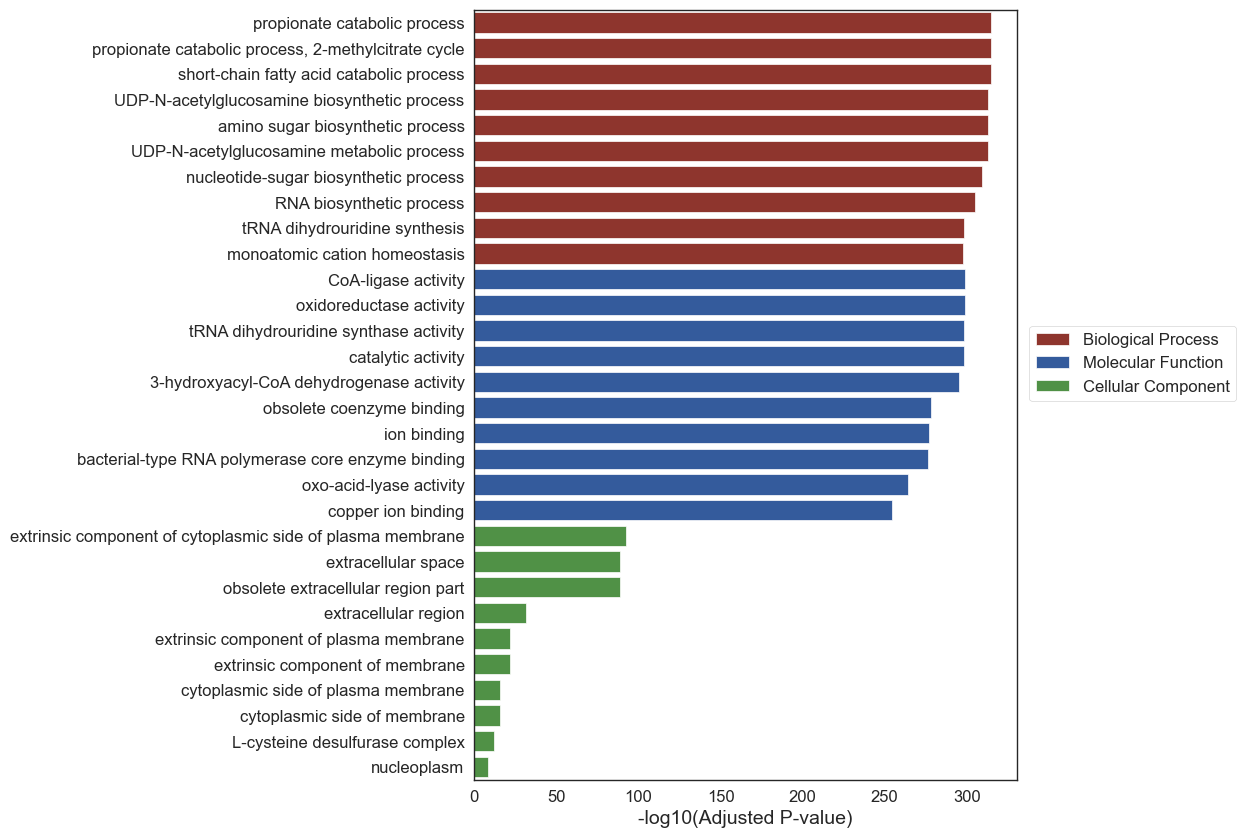

In [6]:
base_path='./pathway_new_hotspot_go1/'
fig = plt.figure(figsize=(7,10))
sns.set_style("white")
config = {
        "font.family":'Times New Roman',  # 设置字体类型
		# "font.size": 80,
        "mathtext.fontset":'stix'
        }
ax=sns.barplot(dataset_fin,x="-log10(Adjusted P-value)",y="Term",hue="process",palette=["#9E271D","#2356AD","#479D3A"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.xaxis.label.set_size(14) ##标题
ax.set(ylabel=None)
plt.legend(bbox_to_anchor=(1.42,0.6),fontsize=12)
# plt.title('GO $P-value<0.01$ Pathway',fontsize=10)
# plt.savefig("./pathway_new_hotspot_go1/new_hotspot_enrichment_bar_df_bp_MF_CC_0.01.png",bbox_inches = 'tight',dpi=600)

In [7]:
with open("all_nine_one_genome_card1.txt") as f:
    rgi_set={}
    for i in f:
        i=i.strip().split("\t")
        if i[1] not in rgi_set.keys():
            rgi_set[i[1]]=[i[0]]
        else:
            rgi_set[i[1]].append(i[0])

In [8]:
gene_list="./all_hotspot_df_MGE_pro_uniq.txt"
enr = gp.enrichr(gene_list=gene_list,#所需查询gene_list，可以是一个列表，也可为文件（一列，每行一个基因）
                 gene_sets=rgi_set,#gene set library，多个相关的gene set 。如所有GO term组成一个gene set library.
#                  organism='Human',#持(human, mouse, yeast, fly, fish, worm)， 自定义gene_set 则无影响。
#                  description='kegg',#工作运行描述
                 outdir='./pathway_new_hotspot_rgi',#输出目录
                 top_term=100,
                 cutoff=0.05#pvalue阈值
                 )

Text(0.5, 1.0, 'RGI $P-value<0.05$ Pathway')

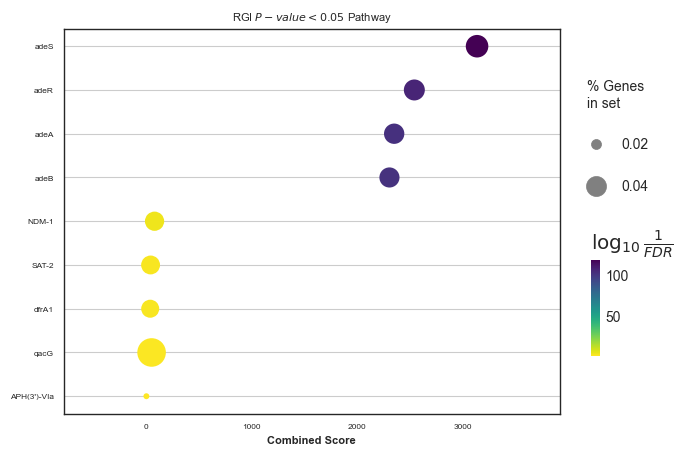

In [9]:
# fig =plt.figure(figsize=(6, 5))
base_path='./pathway_new_hotspot_rgi/'
sns.set_style("white")
config = {
        "font.family":'Times New Roman',  # 设置字体类型# "font.size": 80,
        "mathtext.fontset":'stix'
        }
ax=dotplot(enr.res2d,column="Adjusted P-value",x='Gene ratio', cutoff=0.05, top_term=200,cmap='viridis_r', size=60, figsize=(8,5))
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
ax.xaxis.label.set_size(8) ##标题
ax.yaxis.label.set_size(8)
plt.title('RGI $P-value<0.05$ Pathway',fontsize=8)
# plt.savefig("./pathway_new_hotspot_rgi/all_hotspot_df_MGE_pro_uniq_dotplot_0.05.png", bbox_inches='tight',dpi=800) # 减少边缘空白

Text(0.5, 1.0, 'rgi $P-value<0.05$ Pathway')

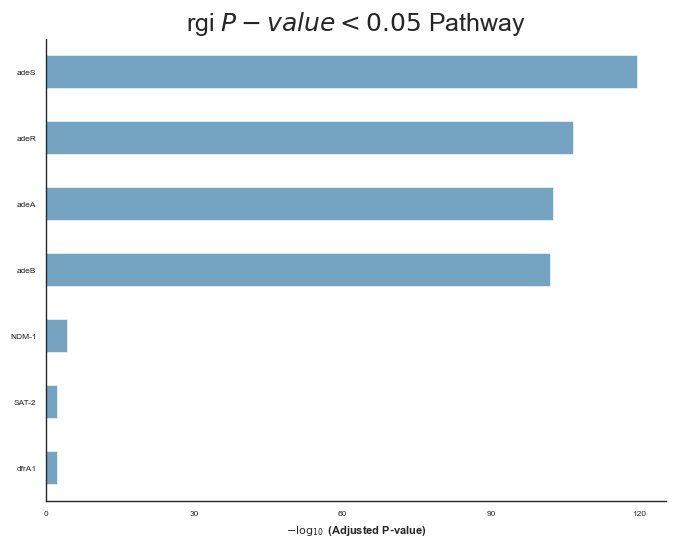

In [10]:
base_path='./pathway_new_hotspot_rgi/'
sns.set_style("white")
config = {
        "font.family":'Times New Roman',  # 设置字体类型# "font.size": 80,
        "mathtext.fontset":'stix'
        }
ax=barplot(enr.res2d, cutoff=0.01,figsize=(8,6),color="#4586AC")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
ax.xaxis.label.set_size(8) ##标题
ax.yaxis.label.set_size(8)
plt.title('rgi $P-value<0.05$ Pathway',fontsize=18)
# plt.savefig("./pathway_new_hotspot_rgi/new_hotspot_enrichment_bar_df_0.01.png",bbox_inches = 'tight',dpi=600)